In [3]:
WEdata=read.csv(file="~/Desktop/Machine Learning Module 1/WineReview(WineEnthusiast).csv", sep=",", header=TRUE)
head(WEdata) # Original Dataset Variables List 
summary(WEdata) # Original Dataset Summary 
# When examining data, price is the only variable that has incomplete datapoints. It is hard to replace wine price 
# datapoints as they vary drastically and have no set price point. Could place with mean or median; however, it wouldn't
# be an accurate represerantation of dataset given. Furthermore, the dataset has around 129953 total rows of data and only 8996 rows are
# incomplete so I am going to remove the rows without a complete dataset. 

WEdata2=WEdata[complete.cases(WEdata),] # Modified Dataset (No Incomplete Row)
summary(WEdata2) 

country,description,points,price,province,title,variety
Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",87,NA,Sicily & Sardinia,Nicosia 2013 Vulkà Bianco (Etna),White Blend
Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2016.",87,15,Douro,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red
US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",87,14,Oregon,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris
US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",87,13,Michigan,St. Julian 2013 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling
US,"Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",87,65,Oregon,Sweet Cheeks 2012 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir
Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",87,15,Northern Spain,Tandem 2011 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot


     country     
 US      :54504  
 France  :22093  
 Italy   :19540  
 Spain   : 6645  
 Portugal: 5691  
 Chile   : 4472  
 (Other) :17026  
                                                                                                                                                                                                                                                                                                        description    
 Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.                                                                                                      :     3  
 Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors o

     country     
 US      :54265  
 France  :17776  
 Italy   :16914  
 Spain   : 6573  
 Portugal: 4875  
 Chile   : 4416  
 (Other) :16156  
                                                                                                                                                                                                                                                                                                        description    
 Cigar box, café au lait, and dried tobacco aromas are followed by coffee and cherry flavors, with barrel spices lingering on the finish. The wood gets a bit out front but it still delivers enjoyment.                                                                                                      :     3  
 Gravenstein apple, honeysuckle and jasmine aromas show on the relatively boisterous nose of this bottling from a large vineyard on Highway 46 east of Paso Robles. There is compellingly grippy texture to the sip, with ripe flavors o

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  80.00   86.00   88.00   88.42   91.00  100.00 

[1] 5

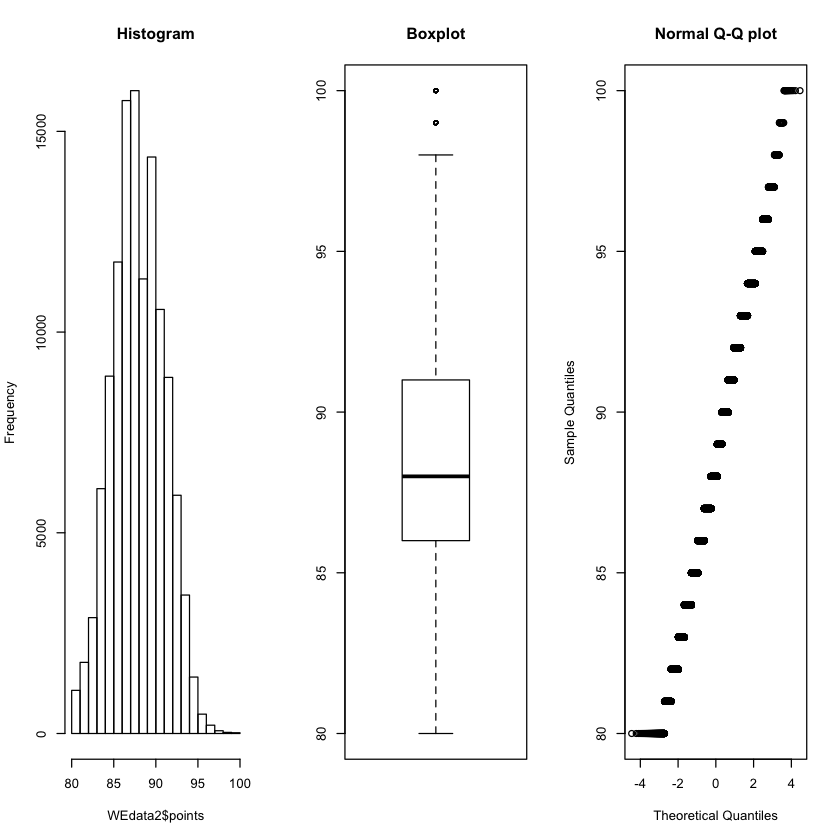

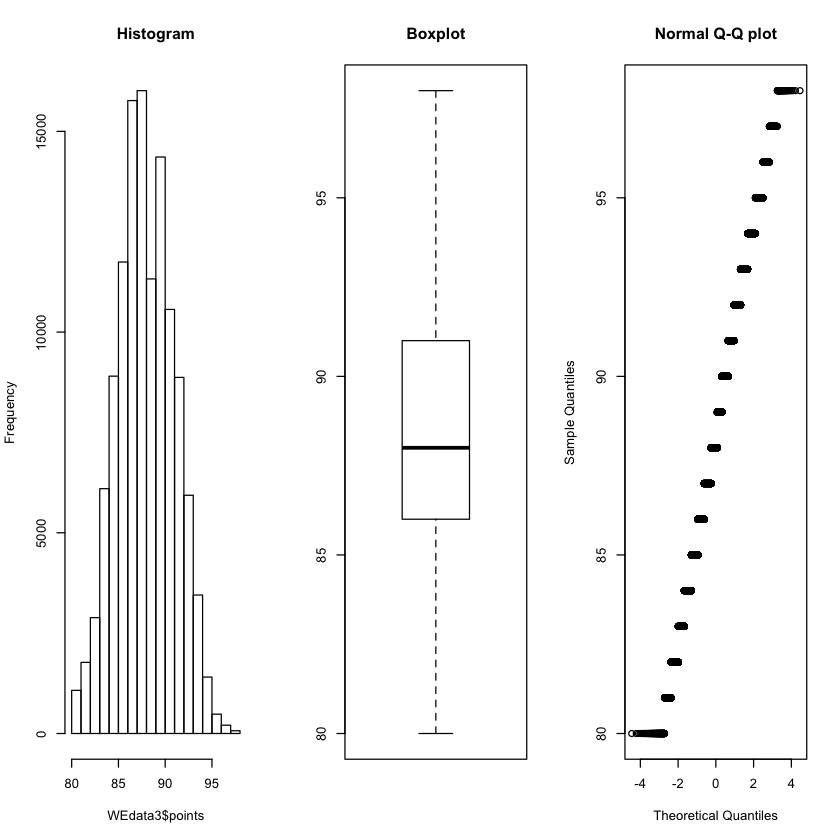

In [4]:
# Removing Outliers for Points Variables 
summary(WEdata2$points)
par(mfrow = c(1, 3))
hist(WEdata2$points, main = "Histogram")
boxplot(WEdata2$points, main = "Boxplot")
qqnorm(WEdata2$points, main = "Normal Q-Q plot")

#Interquartile Range Outlier Elimination Method Utilized 
IQR(WEdata2$points) #Tmin=Q1-(c*IQR), Tmax=Q3+(c*IQR)
Tmin=86-(1.5*5)
Tmax=91+(1.5*5)

WEdata3=WEdata2[WEdata2$points >Tmin & WEdata2$points <Tmax, ]
par(mfrow = c(1, 3))
hist(WEdata3$points, main = "Histogram")
boxplot(WEdata3$points, main = "Boxplot")
qqnorm(WEdata3$points, main = "Normal Q-Q plot")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   17.00   25.00   35.23   42.00 3300.00 

[1] 25

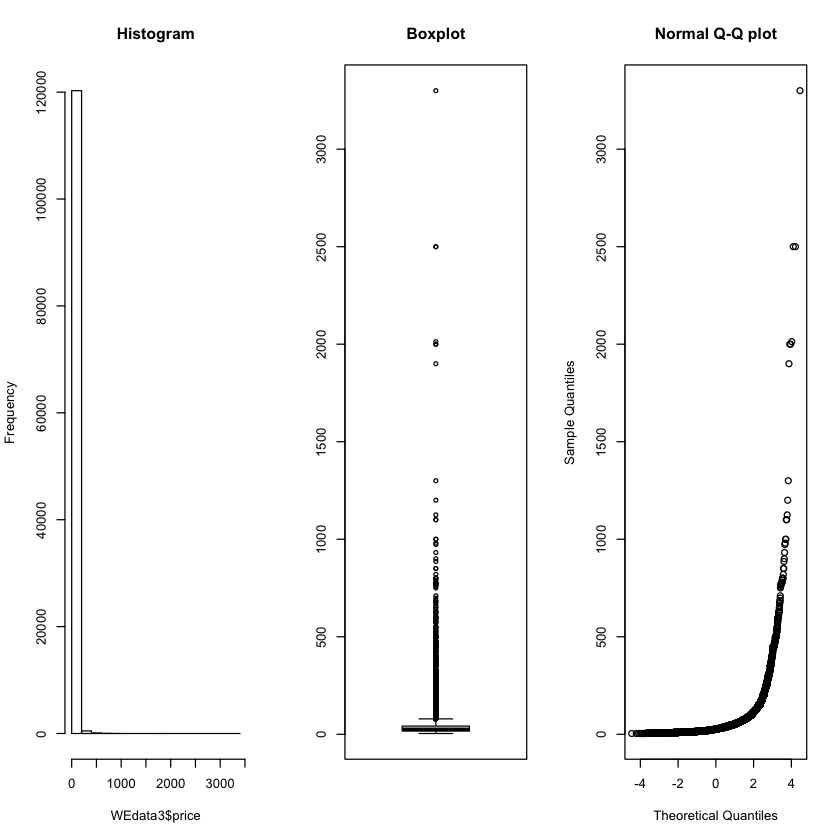

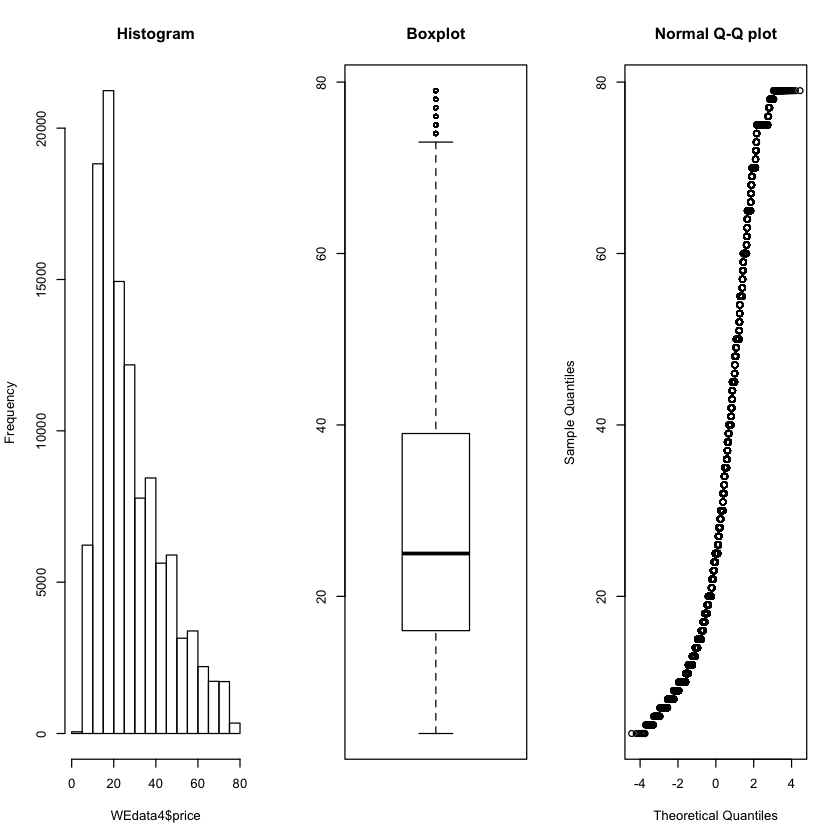

In [5]:
summary(WEdata3$price)
par(mfrow = c(1, 3))
hist(WEdata3$price, main = "Histogram")
boxplot(WEdata3$price, main = "Boxplot")
qqnorm(WEdata3$price, main = "Normal Q-Q plot")

IQR(WEdata3$price) #Tmin=Q1-(c*IQR), Tmax=Q3+(c*IQR)
Tmin2=17-(1.5*25)
Tmax2=42+(1.5*25)
WEdata4=WEdata3[WEdata3$price>Tmin2 & WEdata3$price<Tmax2,]

par(mfrow = c(1, 3))
hist(WEdata4$price, main = "Histogram")
boxplot(WEdata4$price, main = "Boxplot")
qqnorm(WEdata4$price, main = "Normal Q-Q plot")

In [6]:
WEdata4$description=tolower(WEdata4$description)

WEdata4$country=tolower(WEdata4$country)

WEdata4$province=tolower(WEdata4$province)

WEdata4$title=tolower(WEdata4$title)

WEdata4$variety=tolower(WEdata4$variety)

summary(WEdata4)
head(WEdata4)

   country          description            points          price      
 Length:113730      Length:113730      Min.   :80.00   Min.   : 4.00  
 Class :character   Class :character   1st Qu.:86.00   1st Qu.:16.00  
 Mode  :character   Mode  :character   Median :88.00   Median :25.00  
                                       Mean   :88.18   Mean   :29.11  
                                       3rd Qu.:90.00   3rd Qu.:39.00  
                                       Max.   :98.00   Max.   :79.00  
   province            title             variety         
 Length:113730      Length:113730      Length:113730     
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         

,country,description,points,price,province,title,variety
2,portugal,"this is ripe and fruity, a wine that is smooth while still structured. firm tannins are filled out with juicy red berry fruits and freshened with acidity. it's already drinkable, although it will certainly be better from 2016.",87,15,douro,quinta dos avidagos 2011 avidagos red (douro),portuguese red
3,us,"tart and snappy, the flavors of lime flesh and rind dominate. some green pineapple pokes through, with crisp acidity underscoring the flavors. the wine was all stainless-steel fermented.",87,14,oregon,rainstorm 2013 pinot gris (willamette valley),pinot gris
4,us,"pineapple rind, lemon pith and orange blossom start off the aromas. the palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",87,13,michigan,st. julian 2013 reserve late harvest riesling (lake michigan shore),riesling
5,us,"much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",87,65,oregon,sweet cheeks 2012 vintner's reserve wild child block pinot noir (willamette valley),pinot noir
6,spain,"blackberry and raspberry aromas show a typical navarran whiff of green herbs and, in this case, horseradish. in the mouth, this is fairly full bodied, with tomatoey acidity. spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",87,15,northern spain,tandem 2011 ars in vitro tempranillo-merlot (navarra),tempranillo-merlot
7,italy,"here's a bright, informal red that opens with aromas of candied berry, white pepper and savory herb that carry over to the palate. it's balanced with fresh acidity and soft tannins.",87,16,sicily & sardinia,terre di giurfo 2013 belsito frappato (vittoria),frappato


In [ ]:
#RW=("an", "this", "is","a","like","are","its","was","the","much","with","if","of","it","as","in","but")
WEdata4$description=gsub("an","",as.character(WEdata4$description))
WEdata4$description 

In [9]:
summary(WEdata4)

   country          description            points          price      
 Length:113730      Length:113730      Min.   :80.00   Min.   : 4.00  
 Class :character   Class :character   1st Qu.:86.00   1st Qu.:16.00  
 Mode  :character   Mode  :character   Median :88.00   Median :25.00  
                                       Mean   :88.18   Mean   :29.11  
                                       3rd Qu.:90.00   3rd Qu.:39.00  
                                       Max.   :98.00   Max.   :79.00  
   province            title             variety         
 Length:113730      Length:113730      Length:113730     
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  
                                                         
                                                         
                                                         